In [39]:
from demoparser2.demoparser2 import DemoParser


def extract_ticks_df(demo_parser: DemoParser):
    """Given a demo parser object, collect all keyboard and mouse dynamic information per tick for every player.

    Ticks where irregular game states occur are filtered out (e.g. warmup and freeze period, player deaths).

    :param demo_parser: DemoParser object.
    :return: DataFrame containing all tick information.
    """
    key_features = ["FORWARD", "LEFT", "RIGHT", "BACK", "is_walking"]
    mouse_features = ["yaw", "pitch", "usercmd_mouse_dx", "usercmd_mouse_dy"]
    ticks_df = demo_parser.parse_ticks([
        *key_features,
        *mouse_features,
        "is_freeze_period",
        "is_warmup_period",
        "is_alive",
        "total_rounds_played",
    ])
    ticks_df = ticks_df[~ticks_df.is_freeze_period]
    ticks_df = ticks_df[~ticks_df.is_warmup_period]
    ticks_df = ticks_df[ticks_df.is_alive]
    ticks_df = ticks_df.drop(columns=["is_freeze_period", "is_warmup_period", "is_alive"])
    ticks_df[key_features] = ticks_df[key_features].astype(int)
    return ticks_df


def main():
    path = "/Users/ktz/msai/msthesis/res/blast-premier-fall-final-2024-g2-vs-spirit-bo3-keEog6FzQxxIbzN28Nh3S0/g2-vs-spirit-m1-dust2.dem"
    demo_parser = DemoParser(path)
    ticks_df = extract_ticks_df(demo_parser)

    for (player_id, game_round) in ticks_df.groupby(["steamid", "total_rounds_played"]):
        print(player_id)

    return ticks_df


main()

,total_rounds_played,is_walking,BACK,RIGHT,FORWARD,LEFT,pitch,yaw,tick,steamid,name
66100,0,0,0,0,1,0,-2.580750,-40.651474,6611,76561198041683378,NiKo
66101,0,0,0,0,1,0,-0.712738,-23.097382,6611,76561198012872053,huNter
66102,0,0,0,0,1,0,7.700043,13.769989,6611,76561198386265483,donk
66103,0,0,0,0,1,0,2.217529,4.290161,6611,76561199063238565,magixx
66104,0,0,0,0,1,0,17.556152,0.050476,6611,76561198045898864,chopper
...,...,...,...,...,...,...,...,...,...,...,...
2185526,21,0,0,0,0,1,1.451904,-176.160965,218557,76561198080703143,malbsMd
2185531,21,0,1,0,0,1,1.611557,-148.087799,218558,76561198012872053,huNter
2185534,21,0,0,0,0,1,1.078033,3.730896,218558,76561198045898864,chopper
2185535,21,0,0,0,1,1,-3.214188,94.445679,218558,76561198074762801,m0NESY


In [32]:
from demoparser2 import DemoParser


class KSegmentParser:
    def __init__(self, k=64 * 10):
        """

        :param k:
        """
        self._k = k

    def parse(self, path: str):
        # create demo parser and collect all ticks
        demo_parser = DemoParser(path)
        ticks_df = self._init_ticks_df(demo_parser)

        # iterate through all player rounds
        for player_round_df in self._yield_player_rounds(ticks_df):
            pass

        return ticks_df

    @staticmethod
    def _init_ticks_df(demo_parser: DemoParser):
        key_features = ["FORWARD", "LEFT", "RIGHT", "BACK", "is_walking"]
        mouse_features = ["yaw", "pitch", "usercmd_mouse_dx", "usercmd_mouse_dy"]
        ticks_df = demo_parser.parse_ticks([
            *key_features,
            *mouse_features,
            "is_freeze_period",
            "is_warmup_period",
            "is_alive",
            "total_rounds_played",
        ])
        ticks_df = ticks_df[~ticks_df.is_freeze_period]
        ticks_df = ticks_df[~ticks_df.is_warmup_period]
        ticks_df = ticks_df[ticks_df.is_alive]
        ticks_df = ticks_df.drop(columns=["is_freeze_period", "is_warmup_period", "is_alive"])
        ticks_df[key_features] = ticks_df[key_features].astype(int)
        return ticks_df


parser = KSegmentParser()

ans = parser.parse("/Users/ktz/msai/msthesis/res/faze-vs-mouz-m2-mirage-p1.dem")

76561197989430253 0
	 1274 1914
		 640
	 1914 2554
		 640
	 2554 3194
		 352
76561197989430253 1
	 7519 8159
		 640
	 8159 8799
		 640
	 8799 9439
		 640
	 9439 10079
		 640
	 10079 10719
		 640
	 10719 11359
		 640
	 11359 11999
		 640
	 11999 12639
		 640
	 12639 13279
		 366
76561197989430253 2
	 18080 18720
		 640
	 18720 19360
		 640
	 19360 20000
		 640
	 20000 20640
		 640
	 20640 21280
		 640
	 21280 21920
		 640
	 21920 22560
		 640
	 22560 23200
		 640
	 23200 23840
		 640
	 23840 24480
		 121
76561197989430253 3
	 25561 26201
		 640
	 26201 26841
		 640
	 26841 27481
		 640
	 27481 28121
		 640
	 28121 28761
		 640
	 28761 29401
		 640
	 29401 30041
		 640
	 30041 30681
		 209
76561197989430253 4
	 35310 35950
		 640
	 35950 36590
		 640
	 36590 37230
		 640
	 37230 37870
		 640
	 37870 38510
		 640
	 38510 39150
		 640
	 39150 39790
		 640
	 39790 40430
		 462
76561197989430253 5
	 40252 40892
		 320
	 42172 42812
		 640
	 42812 43452
		 640
	 43452 44092
		 101
76561197989

In [3]:
ans.tick.max()

np.int32(62335)

In [45]:
window_seconds = 15  # 15 seconds
window_ticks = window_seconds * 64  # 64hz tickrate

print(window_ticks)

960


In [46]:
import numpy as np

for player_id in ticks_df.steamid.unique():
    player_df = ticks_df[ticks_df.steamid == player_id]
    display(player_df)

    for i, start_tick in enumerate(range(0, len(player_df), window_ticks), start=1):
        player_window_df = player_df.iloc[start_tick: start_tick + window_ticks]

        # extract n_buttons_pressed
        n_buttons_pressed = player_window_df[key_features].sum(axis=1)
        n_buttons_pressed, counts = np.unique(n_buttons_pressed, return_counts=True)
        n_buttons_pressed = n_buttons_pressed.astype(str)
        probs = counts / counts.sum()
        print(n_buttons_pressed, probs)

        # extract mouse features
        mouse_df = player_window_df[mouse_features]
        print(np.sum(np.abs(mouse_df.values), axis=0))

        break
    break

,is_walking,BACK,RIGHT,FORWARD,LEFT,usercmd_mouse_dy,usercmd_mouse_dx,tick,steamid,name
12730,0,0,0,1,0,0.0,0.0,1274,76561197989430253,karrigan
12740,0,0,0,1,0,0.0,0.0,1275,76561197989430253,karrigan
12750,0,0,0,1,0,0.0,0.0,1276,76561197989430253,karrigan
12760,0,0,0,1,0,0.0,0.0,1277,76561197989430253,karrigan
12770,0,0,0,1,0,0.0,0.0,1278,76561197989430253,karrigan
...,...,...,...,...,...,...,...,...,...,...
623260,0,0,0,0,0,0.0,0.0,62331,76561197989430253,karrigan
623270,0,0,0,0,0,0.0,0.0,62332,76561197989430253,karrigan
623280,0,0,0,0,0,0.0,0.0,62333,76561197989430253,karrigan
623290,0,0,0,0,0,0.0,0.0,62334,76561197989430253,karrigan


['1' '2' '3'] [0.60520833 0.159375   0.23541667]
[1390.  184.]


['0' '1' '2' '3' '4'] [4.60009075e-01 3.04727138e-01 1.74813348e-01 6.03885658e-02
 6.18735305e-05]


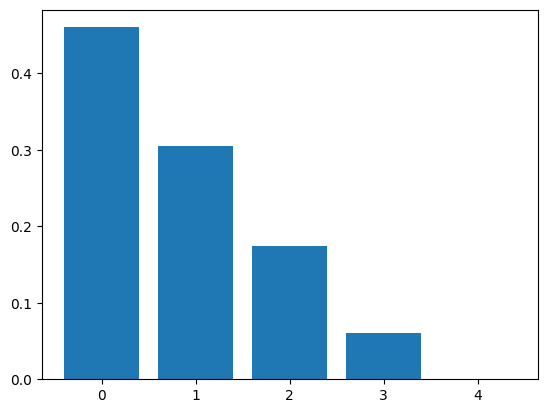

['0' '1' '2' '3' '4'] [4.33919069e-01 3.65198202e-01 1.58189993e-01 4.26721115e-02
 2.06245102e-05]


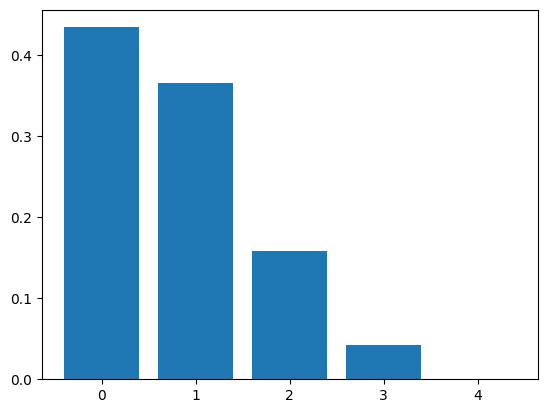

['0' '1' '2' '3' '4'] [0.48496473 0.28756755 0.17423586 0.05271625 0.00051561]


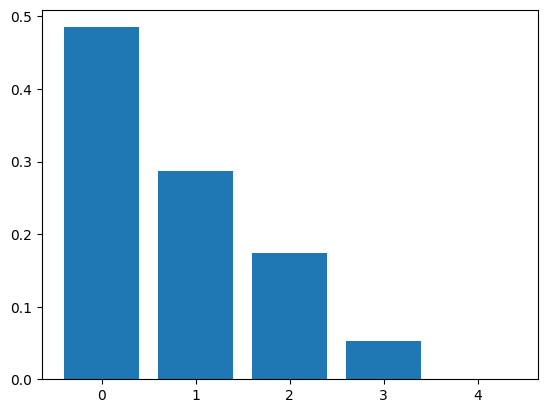

['0' '1' '2' '3'] [0.16505795 0.63476055 0.15627191 0.04390958]


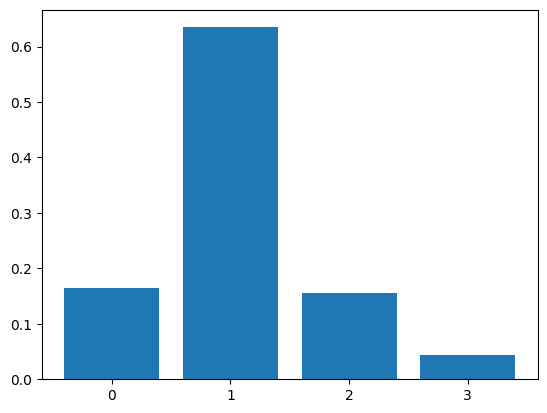

['0' '1' '2' '3' '4'] [0.45268737 0.31508064 0.16346987 0.06300788 0.00575424]


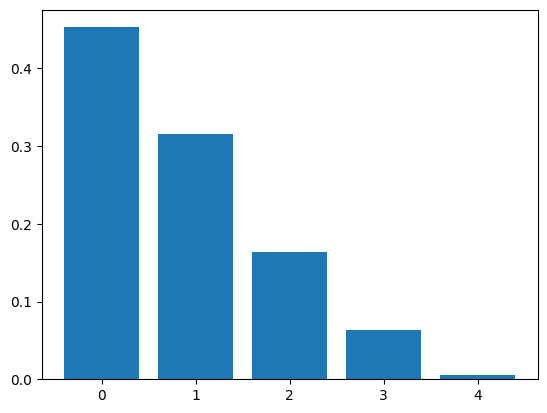

In [8]:
import numpy as np

from matplotlib import pyplot as plt

# plt.hist(ticks_df[["FORWARD", "LEFT", "RIGHT", "BACK"]])
# plt.show()


ticks_df_team = ticks_df[ticks_df["team_num"] == 3]

for player_id in ticks_df_team.steamid.unique():
    player_df = ticks_df_team[ticks_df_team.steamid == player_id]

    n_buttons_pressed = player_df[key_features].sum(axis=1)
    n_buttons_pressed, counts = np.unique(n_buttons_pressed, return_counts=True)
    n_buttons_pressed = n_buttons_pressed.astype(str)
    counts = counts / counts.sum()
    print(n_buttons_pressed, counts)

    plt.bar(x=n_buttons_pressed, height=counts)
    plt.show()

# for player_id in ticks_df.steamid.unique():
#     player_df = ticks_df[ticks_df.steamid == player_id]
#     plt.hist(player_df[["FORWARD", "LEFT", "RIGHT", "BACK"]])
# plt.show()